# 21. Recommender Systems

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F


In [11]:
def read_ml_100k_split(data_path, file_prefix):
    cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    train = pd.read_csv(data_path + file_prefix + '.base', sep='\t', names=cols)
    test = pd.read_csv(data_path + file_prefix + '.test', sep='\t', names=cols)
    return train, test

def read_ml_100k_full(data_path):
    cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    data = pd.read_csv(data_path + 'u.data', sep='\t', names=cols)
    return data


path = '../data/ml-100k/'
file_prefix = 'u1'

data = read_ml_100k_full(path)
print(data.info())
print(data.user_id.nunique())
print(data.movie_id.nunique())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
943
1682
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


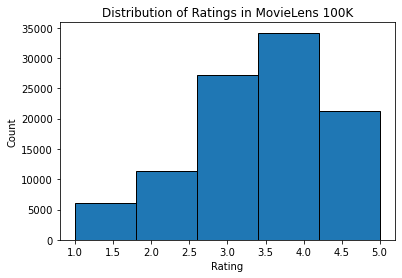

In [17]:
data['rating'].hist(bins=5, ec='black', grid=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens 100K')
plt.show()

In [ ]:
def split_data_ml100k(data, test_size=0.1, split_mode='random'):
    """ Split the dataset in random mode or seq-aware mode. """
    if split_mode == 'seq-aware':
        pass
    else:
        mask = [True if x == 1 else False for x in np.random.uniform(0, 1, (len(data))) < 1 - test_size]

## Matrix Factorization

In [ ]:
class MatrixFactorizer(nn.Module):
    def __init__(self, num_factors, num_users, num_items, **kwargs):
        super(MatrixFactorizer, self).__init__(**kwargs)
        self.P = nn.Embedding(num_users, num_factors)
        self.Q = nn.Embedding(num_items, num_factors)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_bias = nn.Embedding(num_items, 1)

    def forward(self, user_id, item_id):
        P_u = self.P(user_id)
        Q_i = self.Q(item_id)
        b_u = self.user_bias(user_id)
        b_i = self.item_bias(item_id)
        outputs = (P_u * Q_i).sum(axis=1) + np.squeeze(b_u) + np.squeeze(b_i)
        return outputs.flatten()

## AutoRec

In [ ]:
class AutoRec(nn.Module):
    def __init__(self, num_hidden, num_users, dropout=0.05):
        super(AutoRec, self).__init__()
        

# Bayesian Personalized Ranking (BPR)

Bayesian personalized ranking (BPR) (Rendle et al., 2009) is a pairwise personalized ranking loss that is derived from the maximum posterior estimator. It has been widely used in many existing recommendation models. The training data of BPR consists of both positive and negative pairs (missing values). It assumes that the user prefers the positive item over all other non-observed items.

# Neural Collaborative Filtering